# Room Occupancy Detection Using Sensor Data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/feature-analysis-yellowbrick')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%%capture
!pip install pandas==0.22.0

### Importing Libraries

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import yellowbrick as yb

warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Why Visualization Is Necessary: Anscombe's Quartet Example

In [4]:
#data
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])


In [5]:
# verify the summary statistics
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

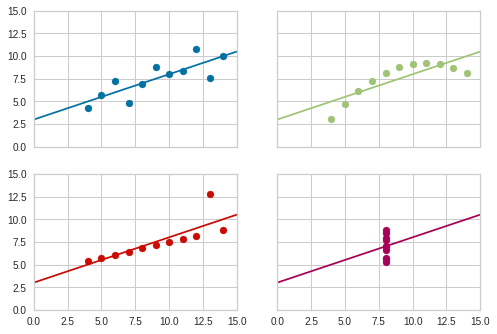

In [6]:
#visualize
g = yb.anscombe()
plt.show()

Even though the summary statistics are completely identical, once we plot the data points, we can see a different story. This is an example of how only statistical analysis can be inadequate.

## Feature Analysis

### Load the Classification Data

In [7]:
# Load the classification data set
data = pd.read_csv('occupancy.csv')
data.dropna(inplace=True)

data.head()

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [8]:
data.describe()

,temperature,relative humidity,light,C02,humidity,occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [9]:
# Specify the features of interest
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ["unoccupied", "occupied"]

In [10]:
# Extract the instances and target
X = data[features]
y = data.occupancy

### Scatter Plot

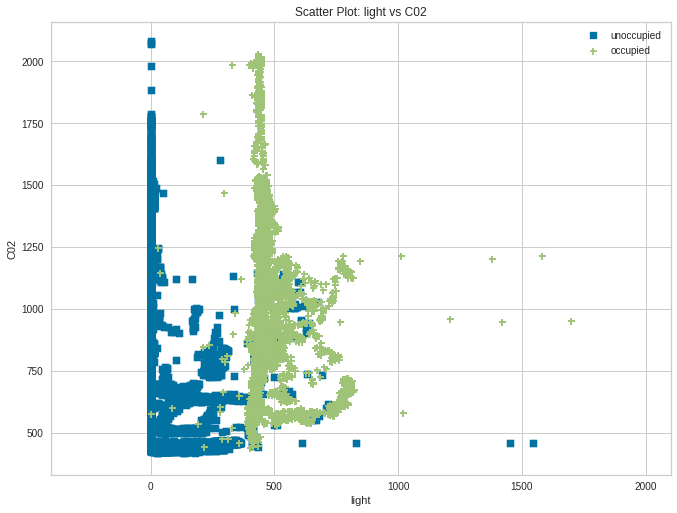

In [11]:
from yellowbrick.contrib import ScatterVisualizer

visualizer = ScatterVisualizer(x="light", y="C02", classes=classes, size=(800, 600))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

### Pairwise Scatterplot

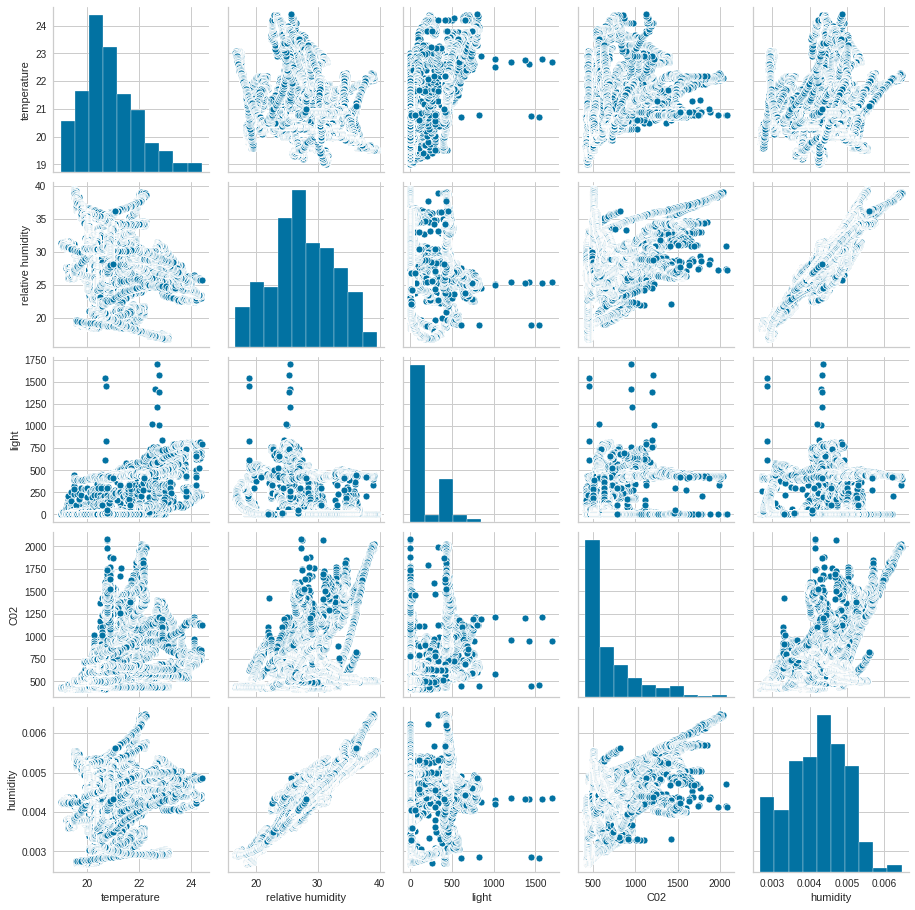

In [12]:
sns.pairplot(X);

### Feature Importance

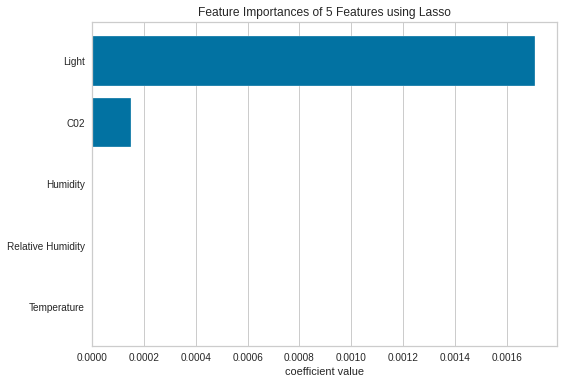

In [16]:
from yellowbrick.features.importances import FeatureImportances
from sklearn.linear_model import Lasso

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(Lasso(), ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.poof()

### RadViz

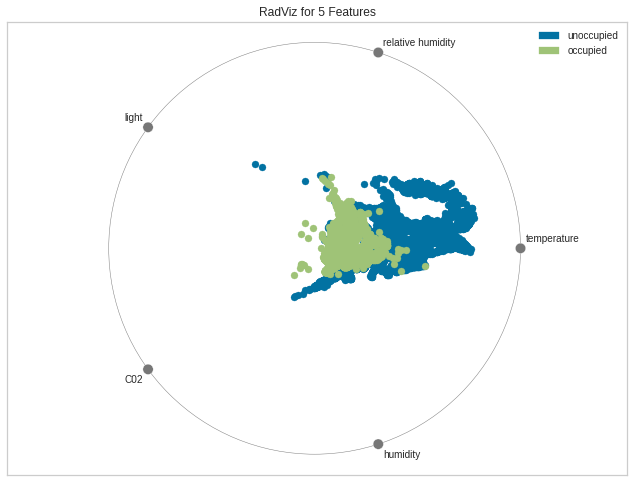

In [17]:
from yellowbrick.features.radviz import RadViz

# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features, size=(800, 600))

# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

### Parallel Coordinates Plot

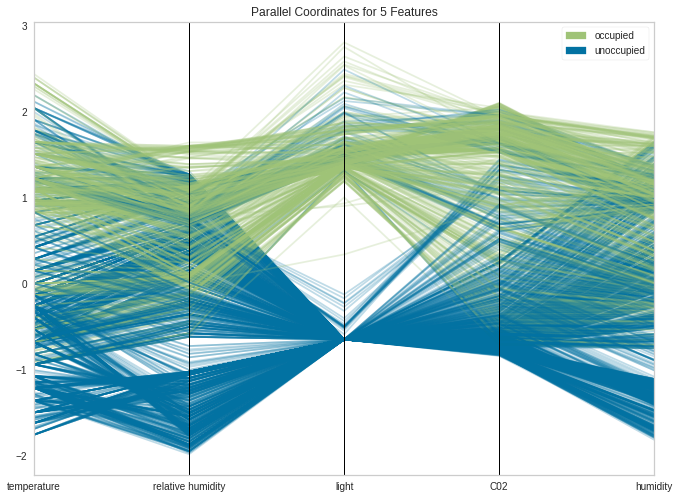

In [18]:
from yellowbrick.features.pcoords import ParallelCoordinates

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, 
    features=features, 
    normalize='standard', 
    sample = 0.1,
    size=(800, 600)
)

# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

### Rank Features

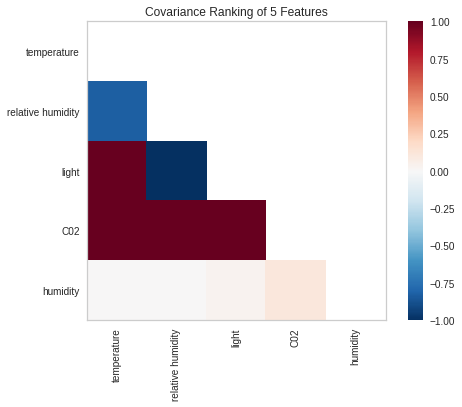

In [19]:
# Instantiate the visualizer with the Covariance ranking algorithm
from yellowbrick.features.rankd import Rank2D
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

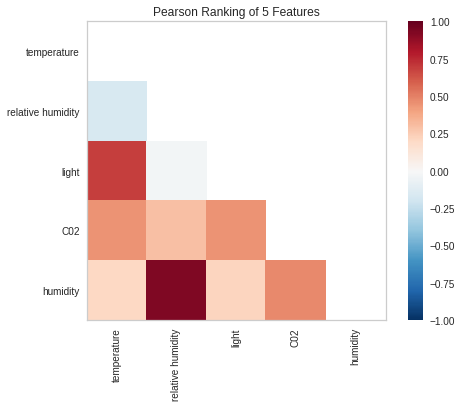

In [20]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

### Manifold Visualization

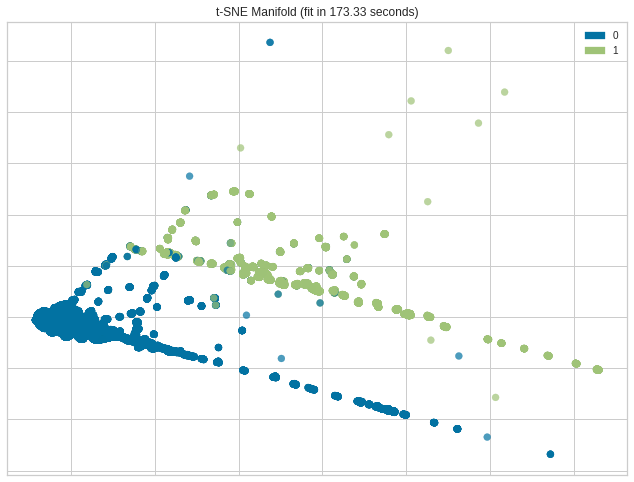

In [21]:
from yellowbrick.features.manifold import Manifold

visualizer = Manifold(manifold='tsne', target='discrete', classes=classes, size=(800, 600))
visualizer.fit_transform(X,y)
visualizer.poof()

## Model Selection and Evaluation

1. Choose a `model family` that best captures the relationship between the variables of interest.
2. Define a `model form` that specifies exactly how features interact to make a prediction.
3. Train a `fitted model` by optimizing internal parameters to the data.

In [22]:
# Create the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Evaluating Class Balance

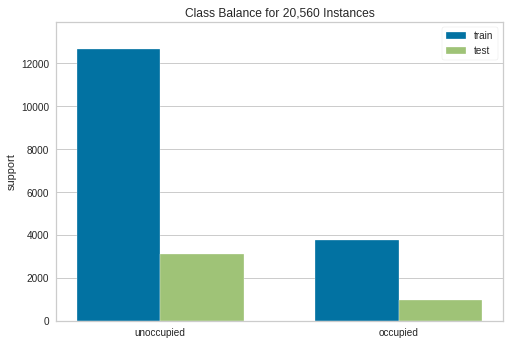

In [23]:
from yellowbrick.classifier import ClassBalance

# Instantiate the classification model and visualizer
visualizer = ClassBalance(labels=classes)

visualizer.fit(y_train, y_test)
visualizer.poof()

### ROC/AUC Plots

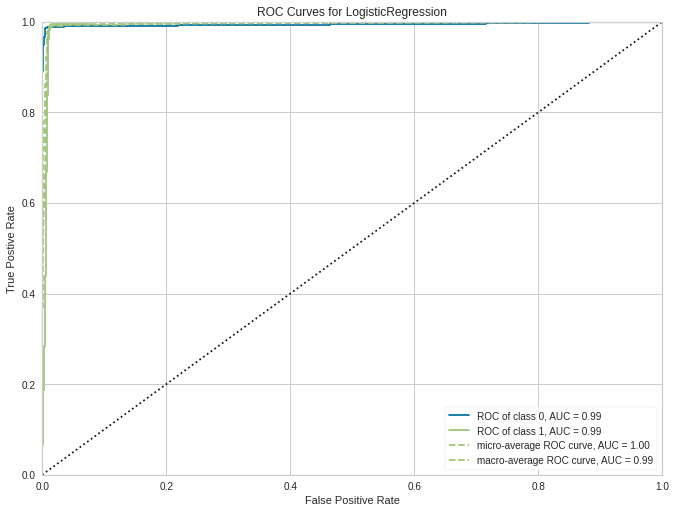

In [24]:
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression

# Instantiate the classification model and visualizer
visualizer = ROCAUC(LogisticRegression(), size=(800, 600))

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)  
# Draw/show/poof the data
g = visualizer.poof()             

### Classification Report and Confusion Matrix

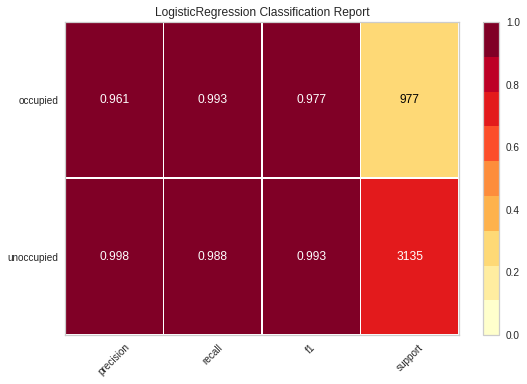

In [25]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(LogisticRegression(), classes=classes, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


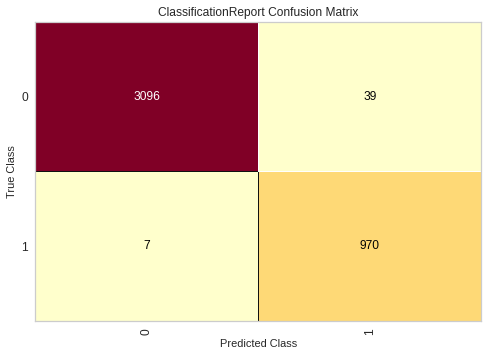

In [26]:
from yellowbrick.classifier import ConfusionMatrix

#The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(visualizer, classes=[0,1])

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

cm.poof()

### Cross Validation Scores

In [27]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

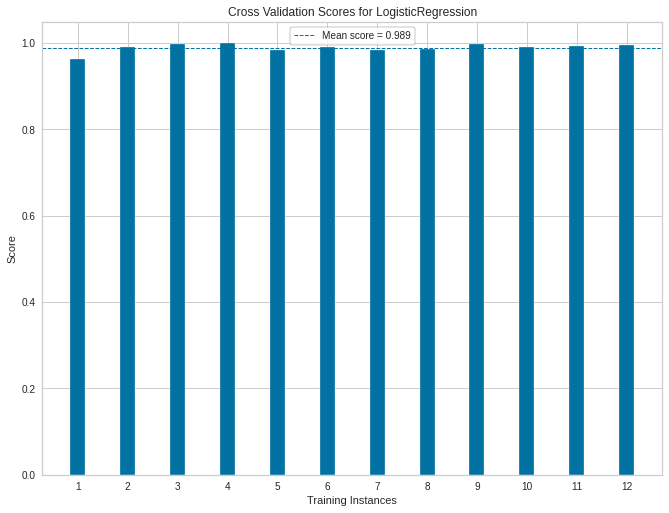

In [28]:
# Create a new figure and axes
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(12)

# Create the CV score visualizer
oz = CVScores(
    LogisticRegression(), ax=ax, cv=cv, 
    scoring='f1_weighted', size=(800,600)
)

oz.fit(X, y)
oz.poof()

### Learning Curve

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import LassoCV
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Create the learning curve visualizer
sizes = np.linspace(0.3, 1.0, 10)

# Create the learning curve visualizer, fit and poof
viz = LearningCurve(LassoCV(), train_sizes=sizes, scoring='r2')
viz.fit(X, y)
viz.poof()